In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [63]:
df.isnull().sem()

show_id         0.000000
type            0.000000
title           0.000000
director        0.004879
cast            0.003105
country         0.003115
date_added      0.000359
release_year    0.000000
rating          0.000227
duration        0.000197
listed_in       0.000000
description     0.000000
dtype: float64

In [64]:
movie_origin = df.groupby('country')['title'].count().sort_values(ascending=False).head(10)
movie_origin

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: title, dtype: int64

## 1. Content Strategy & Catalog Insights

What is the distribution of Movies vs TV Shows on Netflix?

In [65]:
movieCnt = df[df['type'] == "Movie"]['show_id'].count()
Movie_percentage = (movieCnt * 100)/df.shape[0]
print(f'About {Movie_percentage.round(2)} percent content on Netflix is movie based')
TV_Show = 100-Movie_percentage
print(f"While {TV_Show.round(2)} percent content is TV Show.")

About 69.62 percent content on Netflix is movie based
While 30.38 percent content is TV Show.


Which countries contribute the most content to Netflix’s library?

Text(0.5, 1.0, 'Countries with most Content On Netflic')

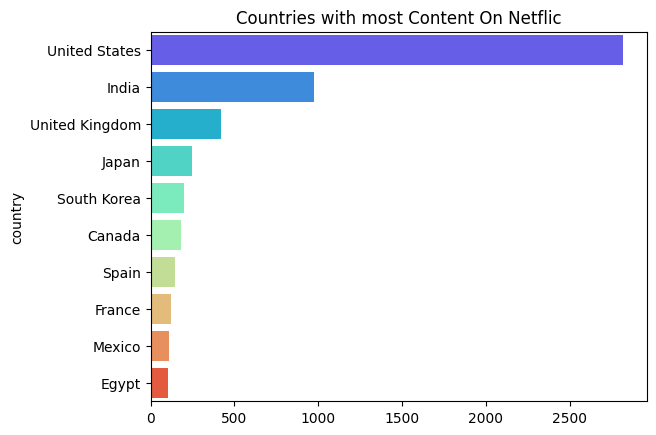

In [66]:
sns.barplot( y = movie_origin.index, x =movie_origin.values, palette='rainbow')
plt.title('Countries with most Content On Netflic')

How has the number of releases changed over time (trend analysis: 2000–2025)?

In [67]:
release_per_year = df[df['release_year'] > 2000]['release_year'].value_counts().head(10)
release_per_year

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

Text(0.5, 1.0, 'Releasing Trend on Netflix')

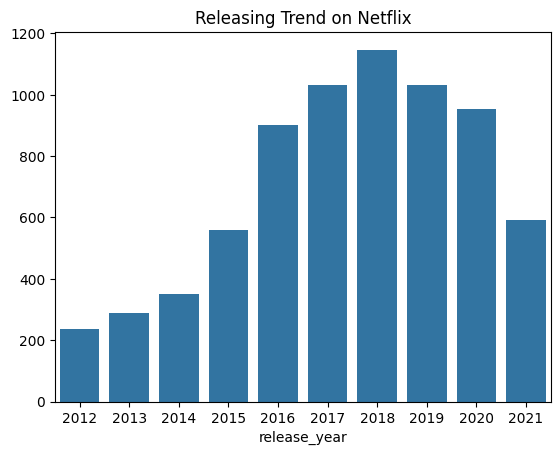

In [68]:
sns.barplot( x=release_per_year.index, y=release_per_year.values)
plt.title('Releasing Trend on Netflix')

Which genres are most common on Netflix (top 10 genres)?

In [69]:
genreCnt = df.groupby('listed_in')['title'].count().sort_values(ascending=False).head(10)
genreCnt

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: title, dtype: int64

Text(0.5, 1.0, 'Top 10 Genres of all time')

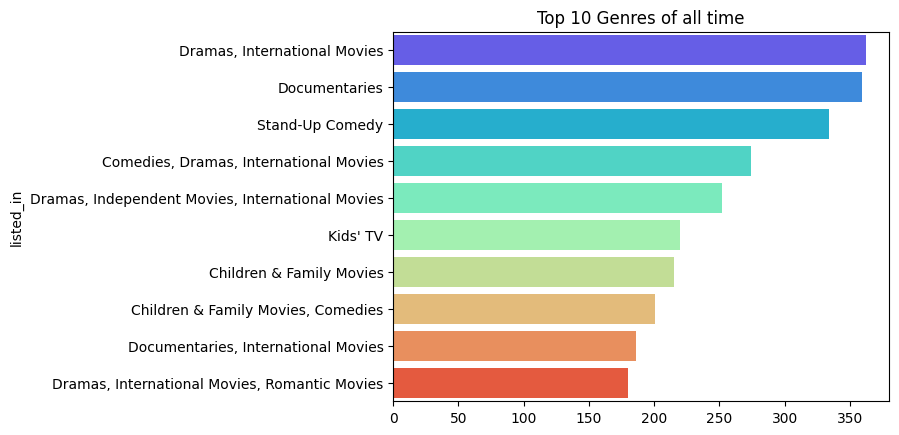

In [70]:
sns.barplot(y=genreCnt.index, x=genreCnt.values, palette='rainbow')
plt.title('Top 10 Genres of all time')

## 2. Audience & Regional Analysis

Which countries prefer TV Shows vs Movies?

In [71]:
tv_pref = df[df['type'] == 'TV Show']['country'].value_counts().head(10)
tv_pref

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: count, dtype: int64

Text(0.5, 1.0, 'Countries which prefer the TV Shows')

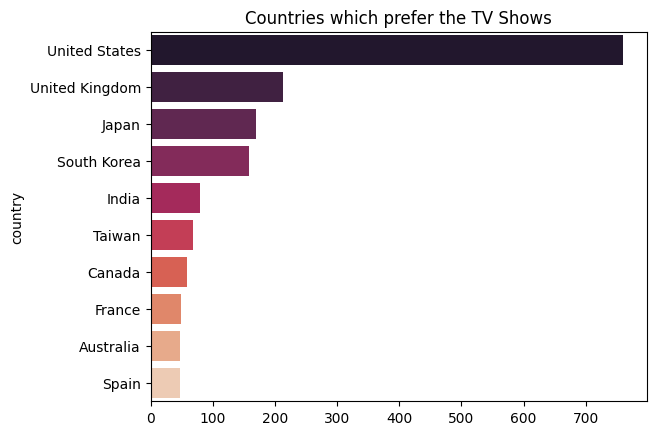

In [72]:
sns.barplot(y=tv_pref.index, x=tv_pref.values, palette='rocket')
plt.title('Countries which prefer the TV Shows')

What’s the average duration of movies on Netflix? Do different countries produce longer/shorter movies?

In [73]:
movie_timing = df.copy() 
movie_timing['duration_int'] = movie_timing['duration'].str.extract('(\d+)').astype(float)
movie_timing.head()
movie_duration_mean = movie_timing[movie_timing['type'] == 'Movie']['duration_int'].mean()
print(f'The average duration of the movies on Netflix is : {movie_duration_mean.round(2)} minutes')

The average duration of the movies on Netflix is : 99.58 minutes


In [74]:
movies = df[df['type'] == 'Movie'].copy()

# Extract numeric duration (minutes only)
movies['duration_int'] = movies['duration'].str.extract('(\d+)').astype(float)

# # Simplify country (first country if multiple)
movies = movies.dropna(subset=['country'])

movies['country'] = movies['country'].apply(lambda x: x.split(",")[0].strip())




In [75]:
avg_duration_country = movies.groupby('country')['duration_int'].mean().sort_values(ascending=False)

print(avg_duration_country.head(10))  # top 10
print(avg_duration_country.tail(10))  # shortest 10


country
Croatia         157.000000
West Germany    150.000000
Soviet Union    147.000000
Cameroon        143.000000
India           126.543689
Iran            123.000000
Pakistan        121.888889
Romania         121.700000
Somalia         118.000000
South Korea     116.063830
Name: duration_int, dtype: float64
country
Singapore    88.500000
Canada       87.657754
Iceland      87.333333
Lebanon      86.944444
Slovenia     84.000000
Uruguay      83.250000
Colombia     81.933333
Georgia      71.500000
Guatemala    69.000000
Namibia      29.000000
Name: duration_int, dtype: float64


Text(0.5, 1.0, 'Countries with avearge movie duration')

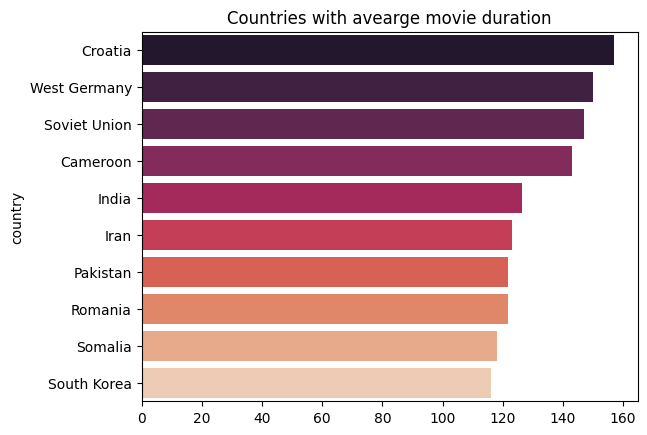

In [76]:
sns.barplot(y=avg_duration_country.head(10).index, x=avg_duration_country.head(10).values, palette='rocket')
plt.title('Countries with avearge movie duration')

## 3. Business-Oriented Questions

Who are the top directors contributing to Netflix’s library?

In [77]:
top_dir = df.dropna(subset=['director'])
most_contributed = top_dir['director'].value_counts().head(10)
most_contributed

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

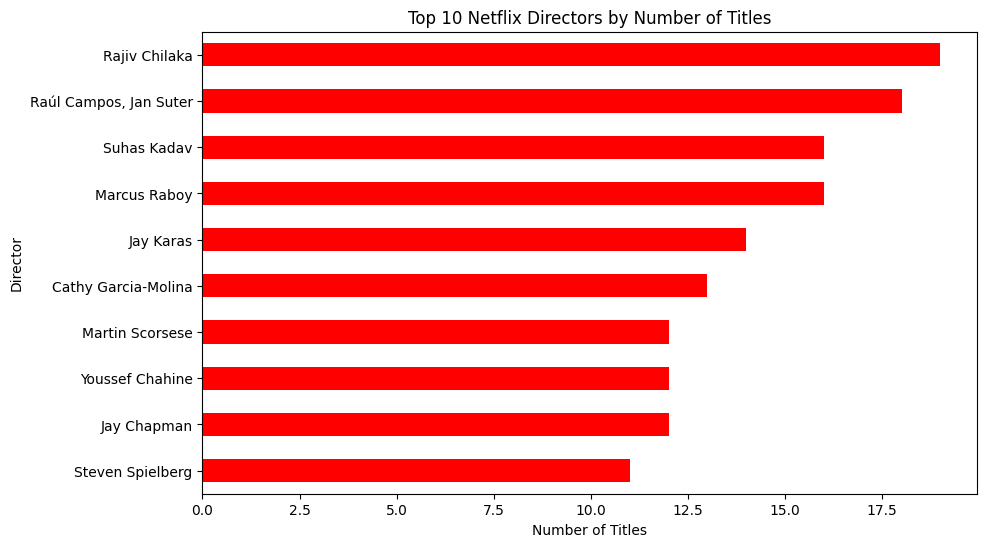

In [78]:
most_contributed.plot(kind='barh', figsize=(10,6), color='red')
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.title("Top 10 Netflix Directors by Number of Titles")
plt.gca().invert_yaxis()  # so highest is at top
plt.show()

Which year had the highest number of Netflix Originals added?

In [79]:
top_10_highest_year = df['release_year'].value_counts().head(10).sort_values(ascending=False)

Text(0.5, 1.0, 'Top 10 Netflix Originals')

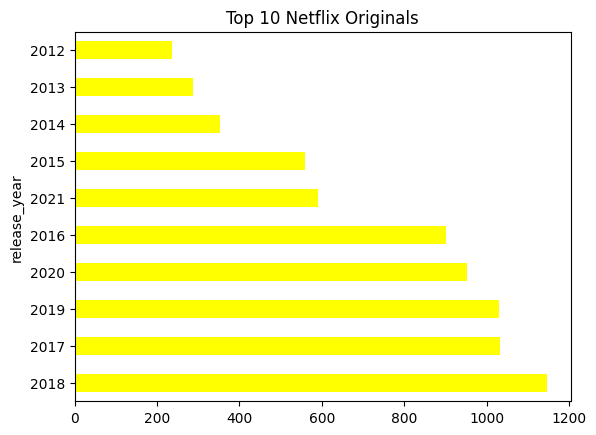

In [80]:
top_10_highest_year.plot(kind='barh', color='yellow')
plt.title('Top 10 Netflix Originals')

Are there seasonal patterns in content release (more shows in December vs June)?

In [81]:
month_pref = df.copy()
month_pref['month'] = pd.to_datetime(month_pref['date_added'], errors='coerce').dt.month_name()
month_pref.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September


In [82]:
dec_shows = month_pref[ month_pref['month'] == 'December']['type'].count()
dec_shows
jun_shows = month_pref[ month_pref['month'] == 'June']['type'].count()
jun_shows

np.int64(724)

In [83]:
month_cnt = month_pref['month'].value_counts()

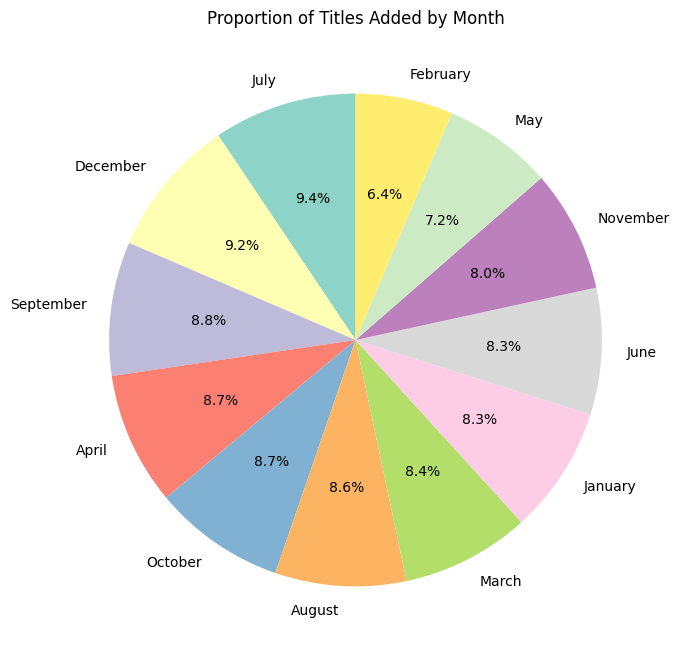

In [84]:
plt.figure(figsize=(8,8))
plt.pie(month_cnt.values, labels=month_cnt.index, autopct='%1.1f%%', 
        startangle=90, colors=sns.color_palette("Set3"))
plt.title("Proportion of Titles Added by Month")
plt.show()


## 4. Advanced / Insightful Analysis

Can we predict the popularity of genres over time using trend analysis?

In [85]:
genre = df.copy()
genre.dropna(subset=['listed_in'])
genre['top_gen'] = genre['listed_in'].apply(lambda x:x.split(',')[0])
popular_genre = genre.groupby('release_year')['top_gen'].value_counts().sort_values(ascending=False).head(10)
popular_genre

release_year  top_gen      
2018          Dramas           216
2017          Dramas           197
2016          Dramas           189
2019          Dramas           166
2017          Documentaries    164
2018          Comedies         138
2020          Dramas           136
2017          Comedies         133
2016          Documentaries    132
2015          Dramas           130
Name: count, dtype: int64

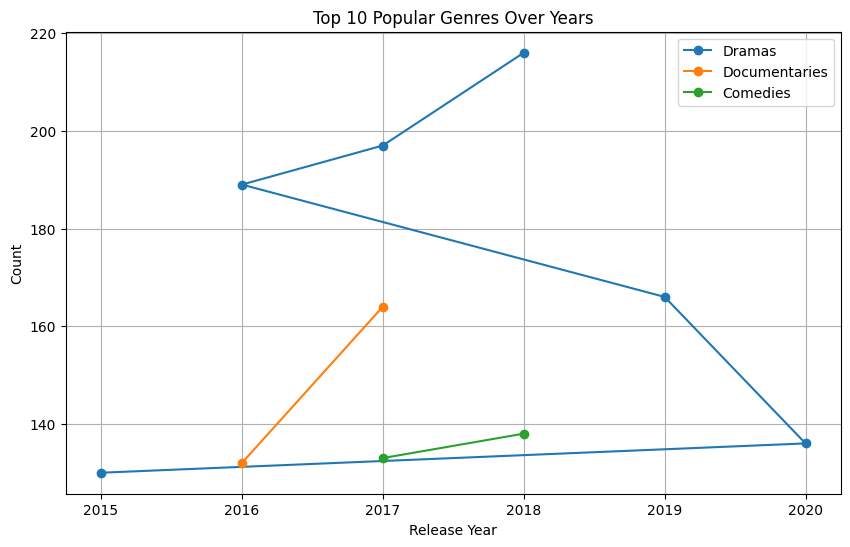

In [86]:

# Reset index to turn MultiIndex into columns
popular_genre_df = popular_genre.reset_index()
popular_genre_df.columns = ['release_year', 'top_gen', 'count']

# Plot a line graph
plt.figure(figsize=(10,6))

for genre in popular_genre_df['top_gen'].unique():
    subset = popular_genre_df[popular_genre_df['top_gen'] == genre]
    plt.plot(subset['release_year'], subset['count'], marker='o', label=genre)

plt.title("Top 10 Popular Genres Over Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

Are TV Shows becoming shorter (fewer seasons/episodes) over time?

In [87]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [88]:
tv_data = df.copy()
tv_data = df[df['type'] == 'TV Show']

tv_data['time_duration'] = tv_data['duration'].str.extract('(\d+)')
tv_duration = tv_data.groupby('time_duration')['release_year'].value_counts().sort_values(ascending=False).head(10)
tv_duration

time_duration  release_year
1              2020            291
               2018            256
               2019            252
               2021            203
               2017            176
               2016            167
               2015            116
2              2019             73
               2020             69
1              2014             64
Name: count, dtype: int64

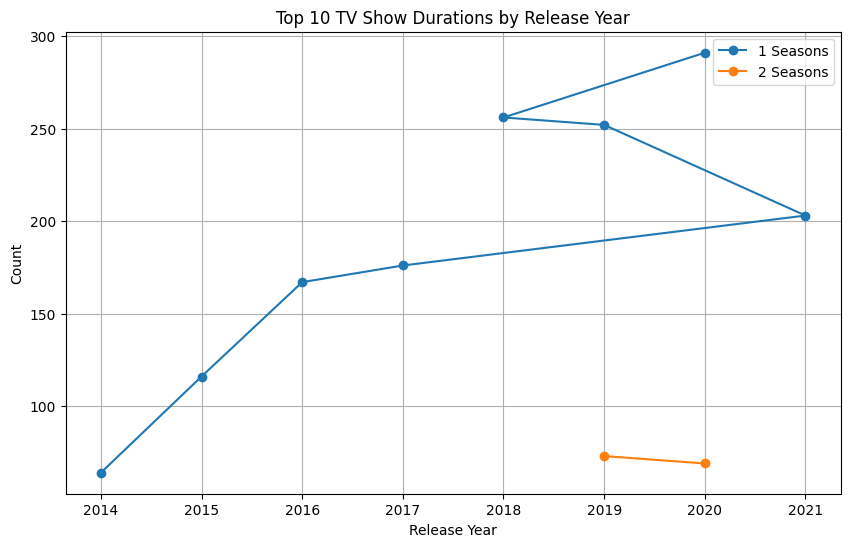

In [89]:
# Reset index to make columns
tv_duration_df = tv_duration.reset_index()
tv_duration_df.columns = ['time_duration', 'release_year', 'count']

# Plot
plt.figure(figsize=(10,6))

for duration in tv_duration_df['time_duration'].unique():
    subset = tv_duration_df[tv_duration_df['time_duration'] == duration]
    plt.plot(subset['release_year'], subset['count'], marker='o', label=f"{duration} Seasons")

plt.title("Top 10 TV Show Durations by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

## Good Work